In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import json
detail = json.loads(open("/content/drive/My Drive/details.json",'r').read())
print(detail[0])

{'link': 'https://bama.ir/car/detail-e2o2619x-mitsubishi-mirage-2016', 'images': ['https://cdn.bama.ir/uploads/BamaImages/VehicleCarImages/47b8f9a2-9c47-4357-b3dc-f42f343ff259/CarImage8488896_0_thumb_450_300.jpg', 'https://cdn.bama.ir/uploads/BamaImages/VehicleCarImages/47b8f9a2-9c47-4357-b3dc-f42f343ff259/CarImage8488896_1_thumb_450_300.jpg', 'https://cdn.bama.ir/uploads/BamaImages/VehicleCarImages/47b8f9a2-9c47-4357-b3dc-f42f343ff259/CarImage8488896_2_thumb_450_300.jpg'], 'year': 2016, 'company': 'میتسوبیشی', 'name': 'میراژ', 'model': 'میراژ', 'history': 3500, 'automatic_gearbox': [0, 1], 'feul': [1, 0, 0, 0], 'body_status': 'بدونرنگ', 'color_outside': 'نقرهای', 'color_inside': 'مشکی'}


In [0]:

body_status_list = []
color_outside_list = []
color_inside_list = []
model_list = []
name_list = []
company_list = []
history_list = []
year_list = []
automatic_gearbox_list = []
feul_list = []
price_list = []

prop_types = {'body_status':[] , 'color_outside':[] , 'color_inside':[] , 'model':[] , 'name':[], 'company':[] , 'producer':[]}
max_history = 0
max_year = 0
min_year = 3000
max_price = 0
is_used=-1
for i in detail:
  try:
    max_price = max(max_price,i["price"])
  except:
    pass
  try:
    max_history = max(max_history,i["history"])

  except:
    pass
  try:
    max_year = max(max_year,i["year"])
    min_year = min(min_year,i["year"])
  except:
    pass
  props = i.keys()
  for p in props:
    if p in prop_types.keys():
      if not i[p] in prop_types[p] :
        prop_types[p].append(i[p])
print(prop_types)



{'body_status': ['بدونرنگ', 'یکلکهرنگ', 'دولکهرنگ', 'گلگیررنگ', 'دوررنگ', 'چندلکهرنگ', 'کاملرنگ', 'یکدربرنگ', 'گلگیرتعویض', 'کاپوتتعویض', 'کاپوترنگ', 'دربتعویض', 'صافکاریبدونرنگ', 'دودربرنگ', 'اتاقتعویض', 'تصادفی', 'اوراقی', 'سوخته'], 'color_outside': ['نقرهای', 'مشکی', 'خاکستری', 'سفید', 'قرمز', 'سرمهای', 'آلبالویی', 'سفیدصدفی', 'آبی', 'سبز', 'قهوهای', 'نوکمدادی', 'عنابی', 'نارنجی', 'بادمجانی', 'سربی', 'تیتانیوم', 'بژ', 'نقرآبی', 'زرشکی', 'مسی', 'کرم', 'دلفینی', 'ذغالی', 'کربنبلک', 'زرد', 'زیتونی', 'برنز', 'یشمی', 'اطلسی', 'بنفش', 'گیلاسی', 'طلائی', 'طوسی', 'خاکی', 'پوستپیازی'], 'color_inside': ['مشکی', 'قهوهای', 'کرم', 'موکا', 'طوسی', 'مارون', 'شتری', 'نامشخص', 'خاکستری', 'قرمز', 'سفید', 'بژ', 'آبی', 'زرشکی', 'سرمهای', 'نارنجی', 'ذغالی', 'دلفینی', 'نوکمدادی', 'مسی', 'نقرهای', 'خاکی', 'زیتونی'], 'model': ['میراژ', 'GC6-اکسلنت', 'H30کراس', 'ASX-تیپ4', 'پارس-دوگانهسوز', 'i20(مونتاژ)', 'S5-اتوماتیک', 'C70کروک', 'سری5سدان-528i', 'صندوقدار', 'النترا(مونتاژ)', '550-اتوماتیک', 'وانت-دوگانهسو

In [0]:
# print(min_year,max_year,max_history)
# delta_year=max_year+1-min_year
# print(delta_year)

In [0]:

props_list = {'body_status':[] , 'color_outside':[] , 'color_inside':[] , 'model':[] , 'name':[], 'company':[] , 'producer':[] , 'history':[],'year':[],'automatic_gearbox':[],'feul':[],'price':[]}
# max_price = 1000000000
no_price_cars = []
for i in detail:
  props = i.keys()
  if 'price' in props:
    for p in props_list.keys():
      if p in props:
        if p in prop_types.keys():
          f_index = prop_types[p].index(i[p])
          f = [0] * (len(prop_types[p]) + 1)
          f[f_index] = 1
        else :
          f = i[p]
          if p == "year":
            f = [ (f - min_year)**3 / (max_year - min_year)**3 ]
          elif p == "history":
            f = [ (max_history-f)**3 / max_history**3]
          elif p == 'price':
            f = f**0.5 / max_price**0.5
          elif p == 'isused':
            f = f
      else:
        if p in prop_types.keys():
          f = [0] * (len(prop_types[p]) + 1)
          f[-1] = 1
        else :
          if p  == 'history':
            f = [0]
          elif p == 'year':
            f = [0]
          elif p == 'automatic_gearbox':
            f = [0,0,0,0]
          else:
            f = [0,0]
      props_list[p].append(f)
  else :
    no_price_cars.append(i)

In [0]:
# for p in props_list.keys():
#   print(len(props_list[p]),p,props_list[p][2000])

In [0]:
props_list["used_status"]=[]
for i in range(len(props_list['model'])):
  histstatus=props_list["history"][i]
  if(histstatus[0]==1.0):
    histstatus=1.0
  else:
    histstatus=0.0
  props_list["used_status"].append([histstatus])

print(props_list.keys())
for p in props_list.keys():
  print(len(props_list[p]),p,props_list[p][4])

dict_keys(['body_status', 'color_outside', 'color_inside', 'model', 'name', 'company', 'producer', 'history', 'year', 'automatic_gearbox', 'feul', 'price', 'used_status'])
22758 body_status [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
22758 color_outside [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
22758 color_inside [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
22758 model [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [0]:
try:
  del props_list["color_inside"]
except:
  pass
try:
  del props_list["color_outside"]
except:
  pass
try:
  del props_list["producer"]
except:
  pass
try:
  del props_list["name"]
except:
  pass
for p in props_list.keys():
  print(len(props_list[p]),p,props_list[p][1000])

22758 body_status [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
22758 model [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [0]:
from keras import layers
import keras
import numpy as np

inputs = []
not_onehot_imput = []
for p in props_list.keys():
  if p != 'price':
    inputs.append(keras.Input(shape=np.shape(props_list[p][0]),name=p))

con = layers.Concatenate(axis=-1)(inputs)
x = layers.Dense(1000, activation='linear')(con)
x = layers.Dense(350, activation='relu')(x)
# x = layers.Dropout(0.1)(x)
x = layers.Dense(250, activation='relu')(x)
# x = layers.Dropout(0.1)(x)
# x = layers.Dense(250, activation='sigmoid')(x)
# x = layers.Dropout(0.1)(x)
x = layers.Dense(250, activation='relu')(x)
# x = layers.Dropout(0.1)(x)
x = layers.Dense(125, activation='linear')(x)

outputs = layers.Dense(1, activation='linear')(x)


model = keras.Model(inputs=inputs, outputs=outputs)

#from keras.utils import plot_model
# plot_model(model)
model.summary()


Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
body_status (InputLayer)        (None, 19)           0                                            
__________________________________________________________________________________________________
model (InputLayer)              (None, 799)          0                                            
__________________________________________________________________________________________________
company (InputLayer)            (None, 88)           0                                            
__________________________________________________________________________________________________
history (InputLayer)            (None, 1)            0                                            
___________________________________________________________________________________________

In [0]:
import keras.backend as K

def customLoss(yTrue,yPred):
    return K.mean(abs(yTrue-yPred)/yTrue)
    
model.compile(loss=customLoss,
# model.compile(loss='mean_squared_error',

              optimizer='sgd',
              metrics=['mse'])

In [0]:
# def customLoss(yTrue,yPred):
#     return K.mean(abs(yTrue-yPred)/yTrue)
# from keras.models import load_model
# # model=load_model('4_price_linear.h5')
# model = load_model('4_price_linear.h5',custom_objects={'customLoss':customLoss})

In [0]:
# model.summary

In [0]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1,
                                                 patience=2, min_lr=0.0001)
train_p = int(0.8 * len(props_list["price"]))
test_p = train_p + int(0.1 * len(props_list["price"]))
print(train_p,test_p)

props_list_train = {'body_status':[] , 'color_outside':[] , 'color_inside':[] , 'model':[] , 'name':[], 'company':[] , 'producer':[] , 'history':[],'year':[],'automatic_gearbox':[],'feul':[],'price':[]}
props_list_test = {'body_status':[] , 'color_outside':[] , 'color_inside':[] , 'model':[] , 'name':[], 'company':[] , 'producer':[] , 'history':[],'year':[],'automatic_gearbox':[],'feul':[],'price':[]}
props_list_val = {'body_status':[] , 'color_outside':[] , 'color_inside':[] , 'model':[] , 'name':[], 'company':[] , 'producer':[] , 'history':[],'year':[],'automatic_gearbox':[],'feul':[],'price':[]}

for p in props_list.keys():
  props_list_train[p] = props_list[p][:train_p]
  props_list_test[p] = props_list[p][train_p:test_p]
  props_list_val[p] = props_list[p][test_p:]
props_list_val
try:
  y_train = props_list_train.pop('price')
  y_test = props_list_test.pop('price')
  y_val = props_list_val.pop('price')
except:
  pass


for p in props_list_train:
  props_list_train[p] = np.array(props_list_train[p])
for p in props_list_test:
  props_list_test[p] = np.array(props_list_test[p])
for p in props_list_val:
  props_list_val[p] = np.array(props_list_val[p])

H = model.fit(
    props_list_train, np.array(y_train),validation_data=[props_list_val,np.array(y_val)],
    batch_size=30,
    epochs=100, callbacks=[callback,reduce_lr])


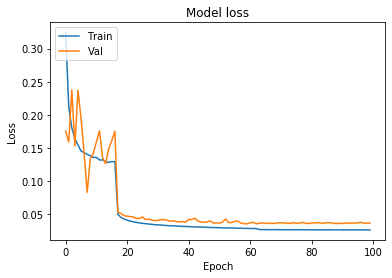

In [0]:
import matplotlib.pyplot as plt
history = H
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
np_y_test=np.array(y_test)
res = model.evaluate(props_list_test,np_y_test)
print(res)
#prev res: [0.008214581886838589, 0.052732864039448595]

2275/2275 [==============================] - 0s 66us/step
[0.03274375896532457, 0.00033202438400661735]


12 12 12
870982.8808927558 - 2010 - اپتیما-GTلاین - بدونرنگ real price : 310000000.00000006 estimated price : 677564014.7862419 - 118 %
999999.0 - 2013 - X4-28 - بدونرنگ real price : 820000000.0000001 estimated price : 2179571159.708885 - 165 %
357910.20352217916 - 1949 - لندکروزوانتتککابین-2F - چندلکهرنگ real price : 29500000.000000004 estimated price : 69037045.55870505 - 134 %
421874.15625014063 - 1990 - ورنا-اتوماتیک - یکلکهرنگ real price : 89000000.0 estimated price : 205257666.72250256 - 130 %
647213.6747542974 - 1979 - پیکی - بدونرنگ real price : 15000000.000000004 estimated price : 81269833.69392349 - 441 %
2275
[346. 327. 264. 242. 199. 154. 148. 103.  52.  50.  53.  48.  32.  35.
  33.  23.  23.  18.   9.   6.   6.   7.   2.   8.   7.   4.   4.   4.
   4.   1.   7.   4.   4.   2.   1.   1.   1.   3.   0.   1.   2.   1.
   0.   2.   0.   0.   1.   0.   3.   0.   1.   0.   0.   2.   1.   0.
   2.   2.   1.   0.   2.   0.   2.   0.   0.   2.   1.   1.   0.   1.
   0.   0.   0.  

'#wothout any deletion in inputs:\n870982.8808927558 - 2010 - اپتیما-GTلاین - بدونرنگ real price : 310000000.00000006 estimated price : 640788855.2991068 - 106 %\n999999.0 - 2013 - X4-28 - بدونرنگ real price : 820000000.0000001 estimated price : 1912012163.0985522 - 133 %\n647213.6747542974 - 1979 - پیکی - بدونرنگ real price : 15000000.000000004 estimated price : 73906500.34773216 - 392 %\n2275\n'

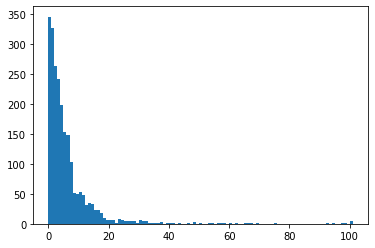

In [0]:
print(len(props_list_test),len(props_list_train),len(props_list_val))
pred = model.predict(props_list_test)
hist=np.zeros(102)
for i in range(1,len(props_list_test["model"])):
  #f = f**0.5 / max_price**0.5
  # real = max_price * y_test[i] 
  # estimate = max_price * pred[i][0]
  real = y_test[i]**2 * max_price 
  estimate = pred[i][0]**2 * max_price
  # print(max_price,real,estimate)
  # print(y_test[i]**2)
  year = int((props_list_test['year'][i][0] * (max_year - min_year)) + min_year)
  percent=int(100 * abs(real - estimate) / real)
  hist[min(101,percent)]+=1
  if(percent>100):
      print(props_list_test['history'][i][0] * max_history,"-",year,"-",prop_types['model'][list(props_list_test['model'][i]).index(1)] , "-" , prop_types['body_status'][list(props_list_test['body_status'][i]).index(1)] ,"real price : {} estimated price : {}".format(real , estimate),"-",int(100 * abs(real - estimate) / real),"%")
print(len(props_list_test["model"]))
print(hist)
sub_hist=[]
for i in range(len(hist)):
  for j in range(int(hist[i])):
    sub_hist.append(i)

import matplotlib.pyplot as plt
x = sub_hist
plt.hist(x, bins = 101)
'''
912024.002025002 - 2013 - اپتیما-GTلاین - بدونرنگ real price : 310000000.00000006 estimated price : 676647727.3395175 - 118 %
999999.0 - 2015 - X4-28 - بدونرنگ real price : 820000000.0000001 estimated price : 1861391289.9155025 - 126 %
562499.0625000625 - 1998 - ورنا-اتوماتیک - یکلکهرنگ real price : 89000000.0 estimated price : 204393744.20920232 - 129 %
931224.0012250012 - 2017 - هایلوکسدوکابینبلند-اتوماتیک - بدونرنگ real price : 530000000.0000001 estimated price : 1069979139.0504885 - 101 %
748224.0182250182 - 1989 - پیکی - بدونرنگ real price : 15000000.000000004 estimated price : 74104337.2004535 - 394 %
776160.0141610142 - 2009 - آزرا(گرنجور) - بدونرنگ real price : 295000000.00000006 estimated price : 602610338.8968664 - 104 %
'''

'''#wothout any deletion in inputs:
870982.8808927558 - 2010 - اپتیما-GTلاین - بدونرنگ real price : 310000000.00000006 estimated price : 640788855.2991068 - 106 %
999999.0 - 2013 - X4-28 - بدونرنگ real price : 820000000.0000001 estimated price : 1912012163.0985522 - 133 %
647213.6747542974 - 1979 - پیکی - بدونرنگ real price : 15000000.000000004 estimated price : 73906500.34773216 - 392 %
2275
'''


In [0]:
sum_of_percentage=0
sum_of_percentage_2=0
for i in range(len(props_list_test["model"])):
  # real = max_price * y_test[i] 
  # estimate = max_price * pred[i][0] 
  real = y_test[i]**2 * max_price
  estimate = pred[i][0]**2 * max_price
  # year = int((props_list_test['year'][i][0] * (max_year - min_year)) + min_year)
  percent=int(100 * abs(real - estimate) / real)
  sum_of_percentage+=percent
  if(percent>100):
    print(percent)
    sum_of_percentage_2-=percent
print(sum_of_percentage/len(props_list_test["model"]))
print((sum_of_percentage_2+sum_of_percentage)/len(props_list_test["model"]))

#prev avg : 37.54
#avg 2: 40

118
165
134
130
441
6.232967032967033
5.798681318681319


In [0]:
# import keras.backend as K

# def customLoss(yTrue,yPred):
#     return K.sum(abs(log(yTrue) - K.log(yPred))/K.log(yPred))

# model.compile(loss=customLoss, optimizer = .....)

In [0]:
# sum_of_percentage=0
# for i in range(len(props_list_test["model"])):
#   # real = max_price * y_test[i] 
#   # estimate = max_price * pred[i][0] 
#   real = y_test[i]**2 * max_price**2 
#   estimate = pred[i][0]**2 * max_price**2
#   # year = int((props_list_test['year'][i][0] * (max_year - min_year)) + min_year)
#   # sum_of_percentage+=int(100 * abs(real - estimate) / real)
#   print(int(100 * abs(real - estimate) / real))

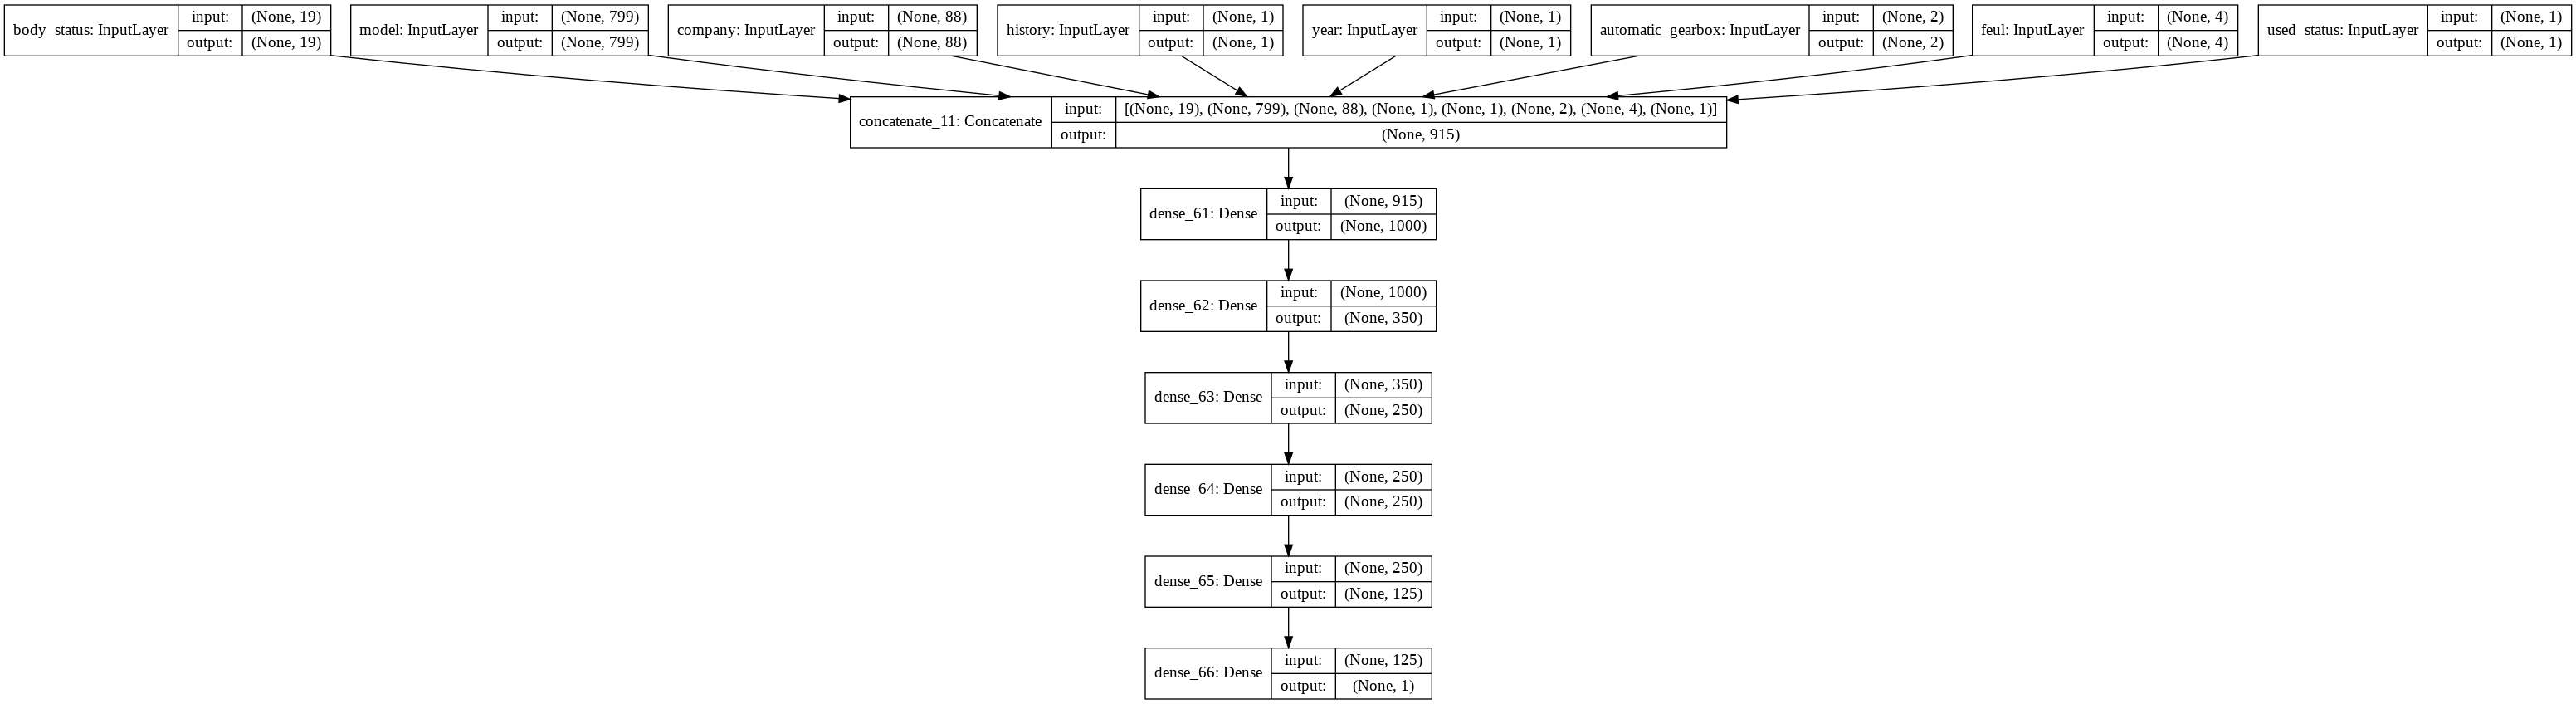

In [0]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [0]:
# model.save("6_price_linear.h5")